In [1]:
from gurobipy import Model,GRB
import  re
import  math
model = Model()
# 列表长度
n_m = 4
#课程数量 新中特 数分 物流 决策 多元统计 学术规范 高级运筹 中微 管科 学术前沿 审计理论研究 会计研究方法 财务会计研究 会计理论研究 计量经济学
n_i = 25
lessons = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V","W", "X", "Y"]
n_j = 24
teachers = ["wc", "alp", "zjy", "wj", "zsc", "njb", "yjl", "wds", "lrh", "lyj", "gzh", "zjx", "jyf", "ls", "zl", "wj", "md", "zgp", "yb", "xh", "zxn", "lwa", "hc", "wll"]
n_t = 12
n_k = 5
n_p = 10
classrooms = ["主楼333", "学院520", "学院621", "学院521", "学院A502", "学院620", "学院622", "学院A501-3", "学院619", "学院422"]
M = 10000

# 常量
c = [11, 19, 32, 4]
e = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]]
s = [20, 21, 18, 15]
o = e
g = [2, 2, 2, 2, 2, 1, 3, 3, 2, 1, 4, 3, 3, 3, 2, 2, 3, 3, 2, 2, 4, 2, 2, 2, 2]
slots = [2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 4, 3, 3, 3, 2, 2, 3, 3, 3, 3, 4, 2, 3, 3, 3]
r = [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
b = [2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2]
v = [70, 35, 35, 35, 70, 45, 35, 35, 35, 35]
a = [[[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]],
[[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]],
[[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]],
[[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]],
[[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]],
[[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]],
[[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]],
[[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]],
[[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]],
[[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]]
cor = [(10, 10), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
d = [[math.sqrt(pow(cor[j][0] - cor[i][0], 2)+pow(cor[j][1] - cor[i][1], 2)) for j in range(len(cor))] for i in range(len(cor))]

#决策变量
x = [[[[[[[] for p in range(n_p)] for k in range(n_k)] for t in range(n_t)] for j in range(n_j)] for i in range(n_i)] for m in range(n_m)]
x_temp = [[[[[[[] for p in range(n_p)] for k in range(n_k)] for t in range(n_t + 3)] for j in range(n_j)] for i in range(n_i)] for m in range(n_m)]
xx = [[[[[[] for p in range(n_p)] for k in range(n_k)] for t in range(n_t)] for j in range(n_j)] for i in range(n_i)]
yy = [[[[[[] for p in range(n_p)] for k in range(n_k)] for t in range(n_t + 3)] for j in range(n_j)] for i in range(n_i)]
u = [[[] for j in range(n_j)] for i in range(n_i)]
y = [[[[] for j in range(n_j)] for i in range(n_i)] for m in range(n_m)]
w = [[[[[[] for k in range(n_k)] for t in range(n_t)] for j in range(n_j)] for i in range(n_i)] for m in range(n_m)]
ep = [[[[[[] for k in range(n_k)] for t in range(n_t + 3)] for j in range(n_j)] for i in range(n_i)] for m in range(n_m)]
ww = [[[[[] for k in range(n_k)] for t in range(n_t)] for j in range(n_j)] for i in range(n_i)]
l = [[[[[[] for p in range(n_p)] for pp in range(n_p)] for k in range(n_k)] for t in range(n_t)] for m in range(n_m)]

for m in range(n_m):
    for i in range(n_i):
        for j in range(n_j):
            for k in range(n_k):
                for p in range(n_p):
                    for t in range(n_t):
                        x[m][i][j][t][k][p] = model.addVar(ub=1, vtype=GRB.INTEGER, name = "x_"+str(m)+"_"+str(i)+"_"+str(j)+"_"+str(t)+"_"+str(k)+"_"+str(p))
                    for t in range(n_t + 3):
                        x_temp[m][i][j][t][k][p] = model.addVar(ub=1, vtype=GRB.INTEGER, name = "x_temp"+str(m)+"_"+str(i)+"_"+str(j)+"_"+str(t)+"_"+str(k)+"_"+str(p))

for i in range(n_i):
    for j in range(n_j):
        for k in range(n_k):
            for p in range(n_p):
                for t in range(n_t):
                    xx[i][j][t][k][p] = model.addVar(ub=1, vtype=GRB.INTEGER, name = "xx_"+"_"+str(i)+"_"+str(j)+"_"+str(t)+"_"+str(k)+"_"+str(p))
                for t in range(n_t + 3):
                    yy[i][j][t][k][p] = model.addVar(ub=1, vtype=GRB.INTEGER, name = "yy_"+"_"+str(i)+"_"+str(j)+"_"+str(t)+"_"+str(k)+"_"+str(p))

for i in range(n_i):
    for j in range(n_j):
        u[i][j] = model.addVar(ub = 1, vtype=GRB.INTEGER, name = "u_"+str(i)+"_"+str(j))

for m in range(n_m):
    for i in range(n_i):
        for j in range(n_j):
            y[m][i][j] = model.addVar(ub = 1, vtype=GRB.INTEGER, name = "y_"+str(m)+"_"+str(i)+"_"+str(j))

for m in range(n_m):
    for i in range(n_i):
        for j in range(n_j):
            for k in range(n_k):
                for t in range(n_t):
                    w[m][i][j][t][k] = model.addVar(ub=1, vtype=GRB.INTEGER, name="w_"+str(m)+"_"+str(i)+"_"+str(j)+"_"+str(t)+"_"+str(k))
                for t in range(n_t + 3):
                    ep[m][i][j][t][k] = model.addVar(ub=1, vtype=GRB.INTEGER, name="ep_"+str(m)+"_"+str(i)+"_"+str(j)+"_"+str(t)+"_"+str(k))

for i in range(n_i):
    for j in range(n_j):
        for t in range(n_t):
            for k in range(n_k):
                ww[i][j][t][k] = model.addVar(ub=1, vtype=GRB.INTEGER, name="ww_"+"_"+str(i)+"_"+str(j)+"_"+str(t)+"_"+str(k))

for m in range(n_m):
    for t in range(n_t):
        for k in range(n_k):
            for p in range(n_p):
                for pp in range(n_p):
                    l[m][t][k][p][pp] = model.addVar(ub=1, vtype=GRB.INTEGER, name="l_"+"_"+str(m)+"_"+str(t)+"_"+str(k)+"_"+str(p)+"_"+str(pp))
#约束条件
#约束1：逻辑约束
for m in range(n_m):
    for i in range(n_i):
        for j in range(n_j):
            model.addConstr(y[m][i][j] <= r[j][i])

#约束2：给每个专业安排的课程要在计划大纲内，同一门课，最多只能上一次
for m in range(n_m):
    for i in range(n_i):
        expr  = 0
        for j in range(n_j):
            expr += y[m][i][j]
        model.addConstr(expr <= e[m][i])

#约束3：给每个专业安排的课程的总学分要满足要求
for m in range(n_m):
    expr = 0
    for i in range(n_i):
        for j in range(n_j):
            expr += g[i] * y[m][i][j]
    model.addConstr(expr >= s[m])

#约束4：对于必修课，一定要安排老师
for m in range(n_m):
    for i in range(n_i):
        expr = 0
        for j in range(n_j):
            expr += y[m][i][j]
        model.addConstr(expr >= o[m][i])

#约束5：对于一门课程，老师每周只教授一次
for i in range(n_i):
    for j in range(n_j):
        expr = 0
        for t in range(n_t - 1):
            for k in range(n_k):
                expr += ww[i][j][t][k]
        model.addConstr(expr == r[j][i])

#约束6：每天安排的课程不能超过正常的上课时间：
for i in range(n_i):
    for j in range(n_j):
        for k in range(n_k):
            for t in range(4):
                model.addConstr(4 - t * ww[i][j][t][k] >= slots[i])
            for t in range(4, 8):
                model.addConstr(8 - t * ww[i][j][t][k] >= slots[i])
            for t in range(8, 12):
                model.addConstr(12 - t * ww[i][j][t][k] >= slots[i])

#约束6：逻辑约束线性化
for m in range(n_m):
    for i in range(n_i):
        for j in range(n_j):
            for t in range(n_t):
                for k in range(n_k):
                    model.addConstr(w[m][i][j][t][k] <= y[m][i][j])
                    model.addConstr(w[m][i][j][t][k] <= ww[i][j][t][k])
                    model.addConstr(w[m][i][j][t][k] >= y[m][i][j] + ww[i][j][t][k] - 1)

#约束7：对于每个专业，如果在某天的某个时段安排课程i，课程需要持续gi个时段:
for m in range(n_m):
    for i in range(n_i):
        for j in range(n_j):
            for t in range(n_t):
                for k in range(n_k):
                    for tt in range(t, t + slots[i]):
                        model.addConstr(ep[m][i][j][tt][k] >= w[m][i][j][t][k])

#约束8：对于每个专业，每天的每个时段最多安排一次课程
for m in range(n_m):
    for t in range(n_t - 1):
        for k in range(n_k):
            expr = 0
            for i in range(n_i):
                for j in range(n_j):
                    expr += ep[m][i][j][t][k]
            model.addConstr(expr <= 1)

#约束9：一次课程占用一间教室：
for i in range(n_i):
    for j in range(n_j):
        for t in range(n_t):
            for k in range(n_k):
                expr = 0
                for p in range(n_p):
                    expr += xx[i][j][t][k][p]
                model.addConstr(expr == ww[i][j][t][k])


#约束10：对于每间教室，如果在某天的某个时段安排课程i，课程需要持续“i课程学分”个时段
for i in range(n_i):
    for j in range(n_j):
        for t in range(n_t):
            for k in range(n_k):
                for p in range(n_p):
                    for tt in range(t, t + slots[i]):
                        model.addConstr(yy[i][j][tt][k][p] >= xx[i][j][t][k][p])

#约束11：对于每天的每个时段，一间教室只能安排一次课程
for t in range(n_t):
    for k in range(n_k):
        for p in range(n_p):
            expr = 0
            exprr = 0
            for i in range(n_i):
                for j in range(n_j):
                    expr += yy[i][j][t][k][p]
                    exprr += xx[i][j][t][k][p]
            model.addConstr(expr <= 1)
            model.addConstr(exprr <= 1)

#约束12：逻辑约束
for m in range(n_m):
    for i in range(n_i):
        for j in range(n_j):
            for t in range(n_t):
                for k in range(n_k):
                    for p in range(n_p):
                        model.addConstr(x[m][i][j][t][k][p] <= w[m][i][j][t][k])
                        model.addConstr(x[m][i][j][t][k][p] <= xx[i][j][t][k][p])
                        model.addConstr(x[m][i][j][t][k][p] >= w[m][i][j][t][k] + xx[i][j][t][k][p] - 1)
#约束13：教室容量限制：
for t in range(n_t - 1):
    for k in range(n_k):
        for p in range(n_p):
            expr = 0
            for m in range(n_m):
                exprr = 0
                for i in range(n_i):
                    for j in range(n_j):
                        exprr += x[m][i][j][t][k][p]
                expr += c[m] * exprr
            model.addConstr(expr <= v[p])

#约束14：如果专业m的同学在第k天的t时段开始在教室p上课，课程需要持续
for m in range(n_m):
    for i in range(n_i):
        for j in range(n_j):
            for t in range(n_t):
                for k in range(n_k):
                    for p in range(n_p):
                        for tt in range(t, t + slots[i]):
                            model.addConstr(x_temp[m][i][j][tt][k][p] >= x[m][i][j][t][k][p])

#约束15：对于每个专业，如果相邻两节课安排在不同教室，学生需要更换教室：
for m in range(n_m):
    for t in range(n_t - 1):
        for k in range(n_k):
            for p in range(n_p):
                for pp in range(n_p):
                    expr1 = 0
                    expr2 = 0
                    for i in range(n_i):
                        for j in range(n_j):
                            expr1 += x_temp[m][i][j][t][k][p]
                            expr2 += x_temp[m][i][j][t + 1][k][pp]
                    model.addConstr(l[m][t + 1][k][p][pp] <= expr1)
                    model.addConstr(l[m][t + 1][k][p][pp] <= expr2)
                    model.addConstr(l[m][t + 1][k][p][pp] >= expr1 + expr2 - 1)

obj = 0
for m in range(n_m):
    for t in range(1, n_t):
        for k in range(n_k):
            for p in range(n_p):
                for pp in range(n_p):
                    obj += d[p][pp] * l[m][t][k][p][pp]
model.addConstr(obj == 0)
obj = 0
for m in range(n_m):
    for i in range(n_i):
        for j in range(n_j):
            for t in range(n_t):
                for k in range(n_k):
                    obj += b[t] * ep[m][i][j][t][k]
model.setObjective(obj, GRB.MINIMIZE)
model.optimize()
#model.computeIIS()
#model.write("model1.ilp")

Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-17
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-8300H CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10105095 rows, 4437000 columns and 77021400 nonzeros
Model fingerprint: 0x2f3e7a32
Variable types: 0 continuous, 4437000 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 0 rows and 0 columns (presolve time = 7s) ...
Presolve removed 3000 rows and 488600 columns (presolve time = 12s) ...
Presolve removed 433747 rows and 488600 columns (presolve time = 16s) ...
Presolve removed 9946560 rows and 2451359 columns (presolve time = 20s) ...
Presolve removed 9946560 rows and 2937599 columns (presolve time = 25s) ...
Presol

x_3_0_0_2_3_0 = 1.0
x_3_5_5_5_3_0 = 1.0
x_3_20_21_4_4_6 = 1.0
x_3_21_7_8_1_4 = 1.0
x_3_22_5_4_0_2 = 1.0
x_3_23_22_4_1_1 = 1.0
x_3_24_23_4_2_6 = 1.0


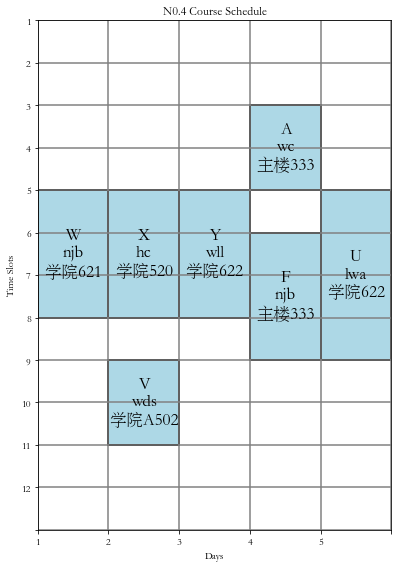

In [7]:
from visualization import CourseSchedule
course_schedule = CourseSchedule(num_days=n_k, num_time_slots=n_t, num = 4)
for i in model.getVars():
    name = re.split(r"_", i.VarName)
    if (name[0] == "x" and name[1] == "3" and i.x == 1):
        print(i.VarName, "=", i.x)
        course_schedule.add_course(teachers[int(name[3])], lessons[int(name[2])], day=int(name[5]), time_slot=int(name[4]), duration=slots[int(name[2])], classroom=classrooms[int(name[6])])
# 可视化课表
course_schedule.plot_schedule()